In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
# Set random seed for reproducibility
np.random.seed(1)

In [3]:
# read dataset
df = pd.read_csv("pay.csv")
df.head()

,years,rating,pay
0,15,2.97,38.40
1,14,3.96,40.63
2,15,2.43,35.99
3,3,2.67,14.13
4,13,3.62,37.55


In [4]:
df.shape

(40, 3)

In [34]:
lm = LinearRegression()
model = lm.fit(df[['years','rating']], df['pay'])

In [36]:
model.intercept_, model.coef_

(0.2618229784275954, array([1.97420984, 2.95701337]))

In [ ]:
yhat = b0 + b1.X1 + b2X2 + ...

In [51]:
pd.DataFrame(df.iloc[:,0:i+1])

,years
0,15
1,14
2,15
3,3
4,13
5,3
6,7
7,2
8,4
9,11


In [53]:
for i in range(df.shape[1]-1):
    X = pd.DataFrame(df.iloc[:,0:i+1])
    y = df.pay
    model = lm.fit(X,y)
    print(model.coef_)

[1.99346]
[1.97420984 2.95701337]


In [5]:
X = df.iloc[:,:-1]
y = df.pay

In [6]:
# Split dataset into training and test sets
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=1)

In [7]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((30, 2), (10, 2), (30,), (10,))

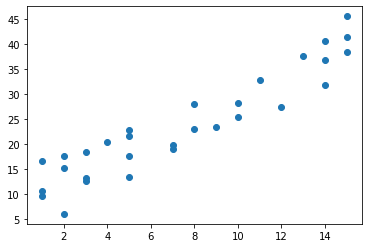

In [8]:
plt.scatter(X_train.years,y_train);

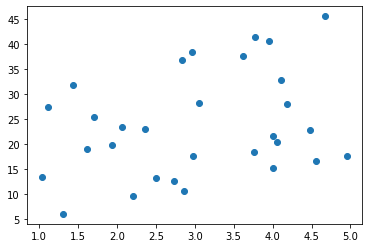

In [9]:
plt.scatter(X_train.rating,y_train);

In [10]:
X_train.years.corr(y_train), X_train.rating.corr(y_train)

(0.9358710414039949, 0.30251303153054127)

In [11]:
# there are two features. First feature appears more correlated to label.
# hence, for the SLR we choose 'years' feature

In [12]:
# SLR Simple Linear Regression

In [13]:
lm = LinearRegression()
model_slr = lm.fit(X_train[['years']],y_train)

In [14]:
model_slr.intercept_, model_slr.coef_

(8.828928640495063, array([2.00425063]))

In [15]:
model_slr.predict(X_train[['years']])

array([14.84168053, 28.87143493, 24.86293367, 18.85018178, 18.85018178,
       18.85018178, 34.88418681, 10.83317927, 32.87993618, 14.84168053,
       38.89268807, 36.88843744, 24.86293367, 10.83317927, 10.83317927,
       18.85018178, 22.85868304, 12.8374299 , 12.8374299 , 36.88843744,
       36.88843744, 38.89268807, 38.89268807, 12.8374299 , 14.84168053,
       28.87143493, 30.87568555, 16.84593115, 22.85868304, 26.8671843 ])

In [16]:
# compute predictions using the model parameters
yhat_train = model_slr.intercept_ + model_slr.coef_ * X_train['years']
yhat_train[0:5]

32    14.841681
17    28.871435
30    24.862934
36    18.850182
33    18.850182
Name: years, dtype: float64

In [17]:
# calculate R Square = 1 - SSE/SST

# sum of squares of errors
SSE = sum((y_train - yhat_train)**2)

In [18]:
# total sum of squares or total variation in target
SST = sum((y_train - np.mean(y_train))**2)

In [19]:
# R Square
model_slr_r_square = 1 - SSE/SST
model_slr_r_square

0.8758546061385976

In [20]:
# sum of squares of regression (variation explained by the model)
SSR = sum((yhat_train - np.mean(y_train))**2)

In [21]:
SSR/SST

0.8758546061385977

In [22]:
# total variation = explained variation + unexplained variation
# SST = SSR + SSE
SST, SSR + SSE

(3162.1707199999996, 3162.17072)

In [23]:
# get this using the model
model_slr.score(X_train[['years']],y_train)

0.8758546061385976

In [24]:
# correlation between feature and label (r)
r = X_train.years.corr(y_train)
r

0.9358710414039949

In [25]:
# this is same as model R Square. Shows that as correlation is higher model fit is better.
r**2

0.875854606138598

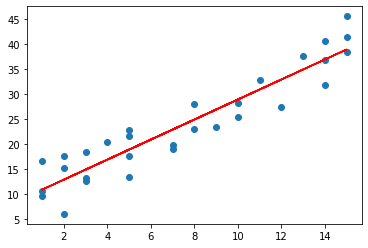

In [26]:
# plot the model
plt.scatter(X_train.years,y_train)
plt.plot(X_train.years,yhat_train,c='r')
plt.show()

In [27]:
# apply model to predict test data
yhat_test = model_slr.predict(X_test[['years']])

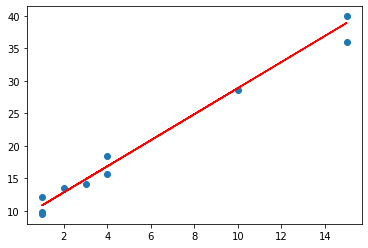

In [28]:
plt.scatter(X_test.years,y_test)
plt.plot(X_test.years,yhat_test,c='r')
plt.show()

In [29]:
# compute train and test MSE
mse_train = np.mean((y_train - yhat_train)**2)
mse_test = np.mean((y_test - yhat_test)**2)
mse_train,mse_test

(13.085630983046482, 1.840420954446683)

In [30]:
# compute train and test MAPE
mape_train = np.mean(abs(y_train - yhat_train)/y_train) * 100
mape_test = np.mean(abs(y_test - yhat_test)/y_test) * 100
mape_train,mape_test

(17.34544551513094, 7.087193686150561)

In [31]:
model_slr_performance = {'model':"model_slr",'R Sq':model_slr_r_square,'train_MSE':mse_train,'test_MSE':mse_test,'train_MAPE':mape_train,'test_MAPE':mape_test}

In [32]:
df_snapshot = pd.DataFrame(columns=['model','R Sq','train_MSE','test_MSE','train_MAPE','test_MAPE'])
df_snapshot

,model,R Sq,train_MSE,test_MSE,train_MAPE,test_MAPE


In [33]:
df_snapshot = df_snapshot.append(model_slr_performance,ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
df_snapshot